In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [2]:
train_data = pd.read_csv('../../Data/preprocessed2-train-bank-data.csv', sep=';')
test_data = pd.read_csv('../../Data/preprocessed2-test-bank-data.csv', sep=';')

X_train, y_train = train_data.drop('y', axis=1), train_data['y']
X_test, y_test = test_data.drop('y', axis=1), test_data['y']

# Bulding optimalized models

In [3]:
rfc = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                            max_depth=9, min_samples_leaf=3, n_estimators=80,
                            random_state=1)

rfc.fit(X_train, y_train)

mlpc = MLPClassifier(hidden_layer_sizes=(110,), max_iter=13, power_t=0.4,
                    random_state=1)

mlpc.fit(X_train, y_train)

c:\Users\frane\anaconda3\envs\kaggleproject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (13) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(110,), max_iter=13, power_t=0.4,
              random_state=1)

- Random Forest Classifier

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      7105
         1.0       0.40      0.62      0.48       870

    accuracy                           0.86      7975
   macro avg       0.67      0.75      0.70      7975
weighted avg       0.89      0.86      0.87      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     28211
         1.0       0.42      0.63      0.51      3617

    accuracy                           0.86     31828
   macro avg       0.69      0.76      0.71     31828
weighted avg       0.89      0.86      0.87     31828



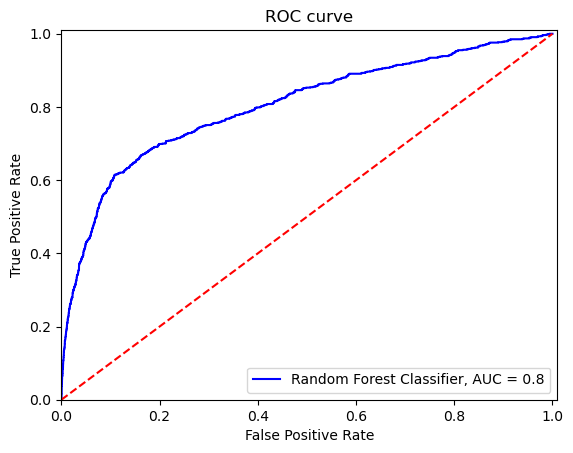

In [4]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, rfc.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, rfc.predict(X_train))}")

roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest Classifier, AUC = {round(roc_auc, 2)}', color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

- Multi-Layer Perceptron Classifier

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7105
         1.0       0.65      0.26      0.37       870

    accuracy                           0.90      7975
   macro avg       0.78      0.62      0.66      7975
weighted avg       0.89      0.90      0.89      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     28211
         1.0       0.67      0.26      0.38      3617

    accuracy                           0.90     31828
   macro avg       0.79      0.62      0.66     31828
weighted avg       0.88      0.90      0.88     31828



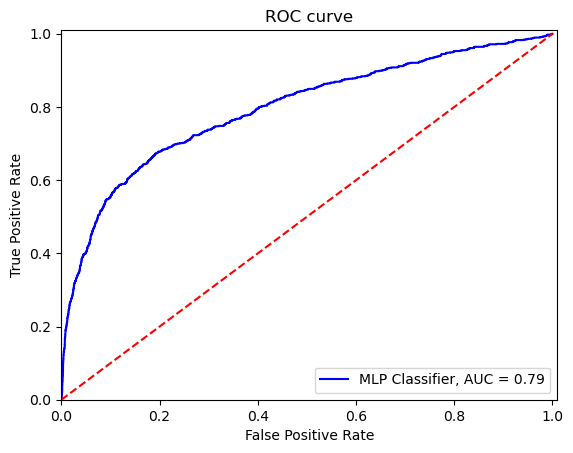

In [5]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, mlpc.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, mlpc.predict(X_train))}")

roc_auc = roc_auc_score(y_test, mlpc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, mlpc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'MLP Classifier, AUC = {round(roc_auc, 2)}', color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

As we decided before, in our case recall is more important than precision, so RFC is best performing model.
Let's check feature importance in the model.

In [6]:
importances = pd.DataFrame(data = rfc.feature_importances_, index = X_train.columns, columns=['Importance'])
print("10 most important features")
importances.sort_values(by='Importance', ascending=False).head(10)


10 most important features


,Importance
euribor3m,0.225649
nr.employed,0.152557
cons.conf.idx,0.089320
emp.var.rate,0.085759
cons.price.idx,0.056540
poutcome_success,0.049325
contacted.in.previous,0.043242
age,0.036708
month_sin,0.029778
month_cos,0.026040


<AxesSubplot:title={'center':'Importance of features (10 most important)'}>

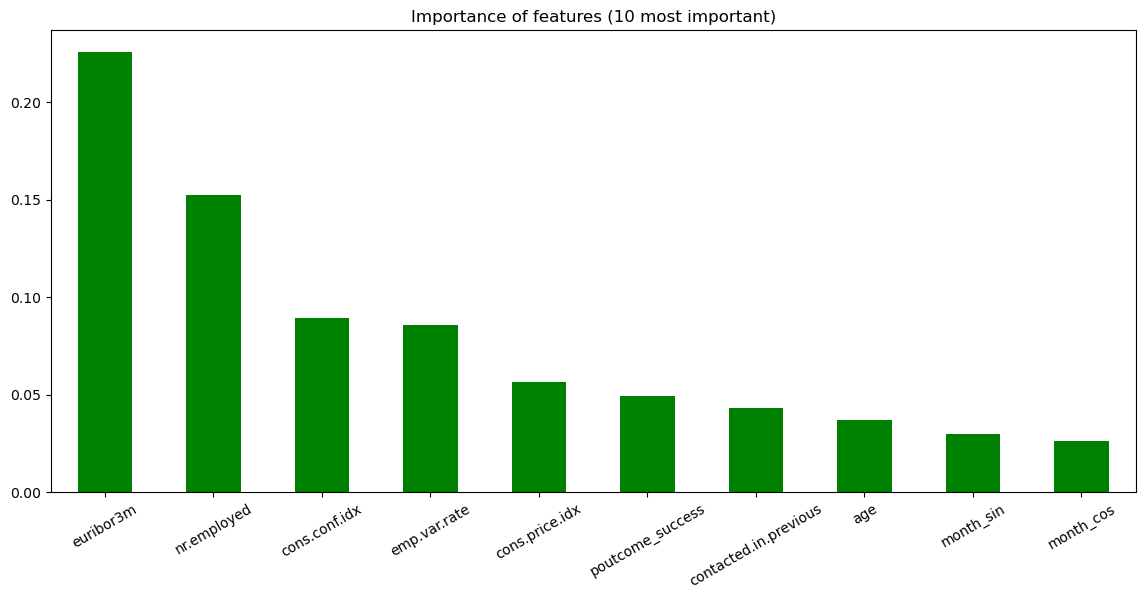

In [7]:
importances = importances.sort_values(by='Importance', ascending=False)[:10]

importances.plot(kind='bar', rot=30, figsize=(14, 6), legend=False,
                title="Importance of features (10 most important)", color='g')